# 1. Data exploration

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
# Load the CSV data
# data = pd.read_csv('/Users/yuval/Desktop/Weizmann stuff/bird_scale_experiment/a_ro_weight_report.csv')
data = pd.read_csv('/Users/cohenlab/Desktop/bird_scale_experiment/a_ro_weight_report.csv')
# Convert Time column to datetime
data['Time'] = pd.to_datetime(data['Time'])

print(data.columns)
# Define the onset and offset timepoints (edit these)
onset_time = '2025-06-15 02:30:00'  # replace with your desired onset
offset_time = '2025-06-15 03:30:00' # replace with your desired offset

# Convert to datetime objects
onset = datetime.fromisoformat(onset_time)
offset = datetime.fromisoformat(offset_time)

# Subset the data
subset_data = data[(data['Time'] >= onset) & (data['Time'] <= offset)]

# Plot the full data
plt.figure(figsize=(15,5))
plt.plot(subset_data['Time'], subset_data['a_ro'], color='gray', alpha=0.4, label='Full data')

# Overlay the subsetted data in color
# plt.plot(subset_data['Time'], subset_data['a_ro'], color='blue', label='Selected period')

# Format x-axis ticks to show only time
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Add labels and legend
plt.xlabel('Time')
plt.ylabel('Weight (grams)')
plt.title('Bird Weight Measurements Over Time')
plt.legend()

# Improve layout and grid
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# # Define onset and offset times
# onset_time = '2025-06-15 03:30:00'  # replace with your desired onset
# offset_time = '2025-06-15 03:40:00' # replace with your desired offset
# onset = datetime.fromisoformat(onset_time)
# offset = datetime.fromisoformat(offset_time)

# Get all CSV files in the current directory
csv_files = [f for f in os.listdir('.') if f.endswith('report.csv')]
print(csv_files)
# Read and store filtered data
filtered_datasets = []

for file in csv_files:
    df = pd.read_csv(file)
    print(df.head())
    df['Time'] = pd.to_datetime(df['Time'])
    if 'weight' not in df.columns:
        df.rename(columns={df.columns[1]: 'weight'}, inplace=True)
    subset = df[(df['Time'] >= onset) & (df['Time'] <= offset)]
    filtered_datasets.append((file, subset))

# Plot each dataset in a separate subplot
num_files = len(filtered_datasets)
fig, axes = plt.subplots(num_files, 1, figsize=(15, 3 * num_files), sharex=True)

if num_files == 1:
    axes = [axes]  # make sure axes is iterable

for ax, (filename, data) in zip(axes, filtered_datasets):
    ax.plot(data['Time'], data['weight'], label=filename, color='blue')
    ax.set_ylabel('Weight (g)')
    ax.set_title(filename)
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Final touches
axes[-1].set_xlabel('Time (HH:MM)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
from pathlib import Path

def extract_bird_name(filename: str) -> str:
    """Extract the bird name from the filename (after first underscore and before second underscore)."""
    cut_prefix = filename.split('_')[1]  # Remove everything before the first underscore
    return cut_prefix.split('_')[0]

# List all CSV files in the current directory
csv_files = list(Path('.').glob('*report.csv'))

# Extract bird names
bird_names = []

for file_path in csv_files:
    filename = file_path.name  # convert Path to string filename
    print(f"Processing file: {filename}")
    bird_name = extract_bird_name(filename)
    bird_names.append(bird_name)

# Print unique bird names
print("Birds found in directory:")
for name in sorted(bird_names):
    print("-", name)


In [ ]:
import numpy as np
import pandas as pd

# # Generate dictionary with real weights:
# weights_dict = {key: [] for key in bird_names}

# weights_dict['ly2rp9'] = [18.5, 18.99, 18.66, 18.49, 19, 18.75, 18.47, ]
# weights_dict['lp114w8rb'] = [18.64, 18.99, 19.24, 18.97, 18.91, 18.82, 18.98]
# weights_dict['ro'] = [18.89, 18.99, 18.64, 18.13, 18.43, 18.30, 17.95]
# weights_dict['lwrb'] = [None, 17.36, 17.21, 16.79, 16.92, 16.89, 16.58]
# weights_dict['llb84b35'] =  [15.05, 15.31, 15.12, 14.85, 14.91, 14.98, 14.95]
# weights_dict['lp92llb8'] = [18.34, 18.59, 18.28, 18.45, 18.29, 18.55, 18.63]

# write the dictionary to a json file
# import json
# weights_json_path = Path('weights.json')
# with open(weights_json_path, 'w') as f:
#     json.dump(weights_dict, f, indent=4)

# Read json file to dictionary for further processing
import json
weights_json_path = Path('weights.json')
with open(weights_json_path, 'r') as f:
    weights_dict = json.load(f)

#write the dictionary to a dataframe 
weights_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in weights_dict.items() if k != 'start_date']))
# Set the index to be the date as a pandas DatetimeIndex, one entry per day
weights_df.index = pd.date_range(start='2025-06-11', periods=len(weights_df), freq='D')

# transpose the dataframe so that dates are columns and birds are rows
weights_df = weights_df.transpose()
# Change the dates to 'YYYY-MM-DD' format
columns = weights_df.columns
columns = [c.strftime('%Y-%m-%d') if isinstance(c, pd.Timestamp) else c for c in columns]
print(columns)
weights_df.columns = [column for column in columns]
print(weights_df)

# add the mean and str dev columns
weights_df['mean'] = np.round(weights_df.mean(axis=1),2)
weights_df['std'] = np.round(weights_df.std(axis=1),2)



print(weights_df)
print(type(columns[1]))
# export to csv
# weights_csv_path = Path('weights.csv')
# weights_df.to_csv(weights_csv_path)



In [12]:
import numpy as np
import json

# Load the weights from the JSON file
weights_json_path = Path('weights.json')
with open(weights_json_path, 'r') as f:
    weights_dict = json.load(f)
# Convert weights to numpy arrays for easier manipulation
weights_dict = {key: np.array(value, dtype=np.float32) for key, value in weights_dict.items() if key != 'start_date'}
# Calculate the mean and standard deviation for each bird
weights_stats = {key: {'mean': np.nanmean(value), 'std': np.nanstd(value)} for key, value in weights_dict.items()}
# Print the statistics
for bird, stats in weights_stats.items():
    print(f"{bird}: Mean = {stats['mean']:.2f}, Std = {stats['std']:.2f}")
    

ly2rp9: Mean = 18.67, Std = 0.22
llb84b35: Mean = 15.00, Std = 0.14
lp114w8rb: Mean = 18.85, Std = 0.20
lwrb: Mean = 16.84, Std = 0.27
lp92llb8: Mean = 18.48, Std = 0.13
ro: Mean = 18.32, Std = 0.39


# 1.1 Full weight report histograms + metadata

1: llb84b35
--- Dataset for bird 'llb84b35' ---
Shape: (686302, 2)
Date range: 2025-06-10 11:19:04 → 2025-06-20 10:00:50
Weight range: 0.00g → 2822.72g

Counts per weight bin:
0g: 270318 samples
0–2g: 160696 samples
2–4g: 4438 samples
4–8g: 29165 samples
8–12g: 4732 samples
12–20g: 90634 samples
20–25g: 62 samples
>25g: 125935 samples

Mode weight of whole data: 0.00g
Median weight of whole data: 0.10g

Mode weight of filtered data: 15.26g
Median weight of filtered data: 15.03g

Real mean weight: 15.00g
Real std weight: 0.14g


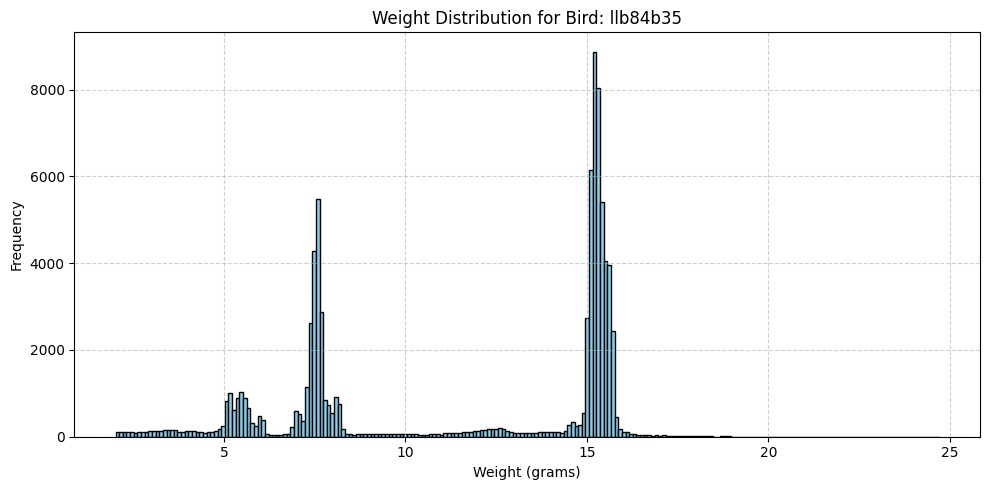

2: lp114w8rb
--- Dataset for bird 'lp114w8rb' ---
Shape: (686404, 2)
Date range: 2025-06-10 11:19:04 → 2025-06-20 10:00:50
Weight range: 0.00g → 2000.00g

Counts per weight bin:
0g: 425302 samples
0–2g: 23284 samples
2–4g: 1086 samples
4–8g: 32780 samples
8–12g: 708 samples
12–20g: 195459 samples
20–25g: 6272 samples
>25g: 1236 samples

Mode weight of whole data: 0.00g
Median weight of whole data: 0.00g

Mode weight of filtered data: 18.96g
Median weight of filtered data: 18.70g

Real mean weight: 18.85g
Real std weight: 0.20g


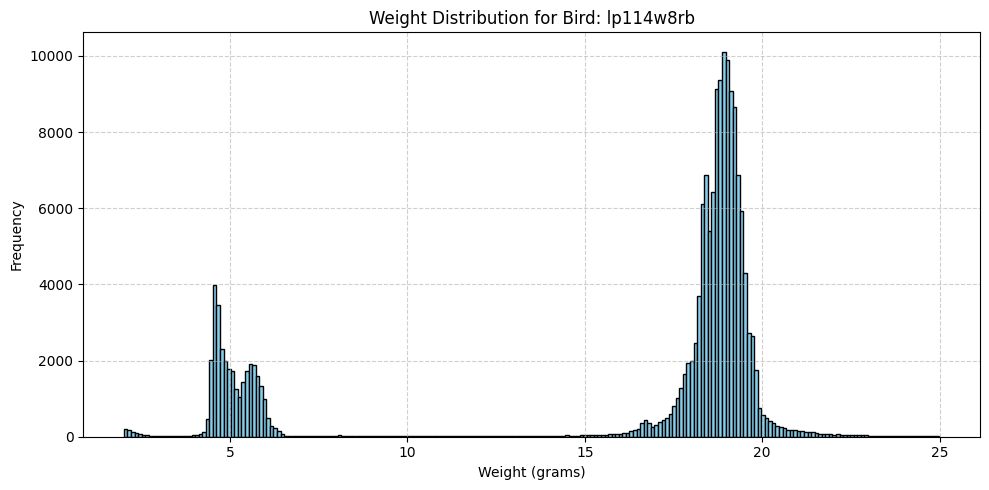

3: lp92llb8
--- Dataset for bird 'lp92llb8' ---
Shape: (686302, 2)
Date range: 2025-06-10 11:19:04 → 2025-06-20 10:00:50
Weight range: 0.00g → 1269.01g

Counts per weight bin:
0g: 336571 samples
0–2g: 141530 samples
2–4g: 44 samples
4–8g: 132 samples
8–12g: 837 samples
12–20g: 205263 samples
20–25g: 1433 samples
>25g: 148 samples

Mode weight of whole data: 0.00g
Median weight of whole data: 0.02g

Mode weight of filtered data: 17.96g
Median weight of filtered data: 17.86g

Real mean weight: 18.48g
Real std weight: 0.13g


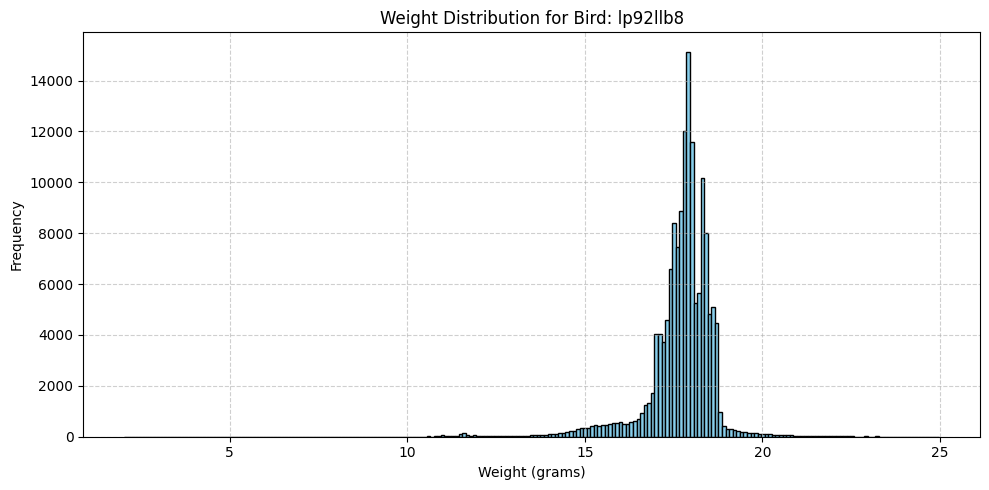

4: lwrb
--- Dataset for bird 'lwrb' ---
Shape: (546771, 2)
Date range: 2025-06-12 10:55:57 → 2025-06-20 10:00:50
Weight range: 0.00g → 1617.83g

Counts per weight bin:
0g: 281443 samples
0–2g: 206308 samples
2–4g: 29 samples
4–8g: 621 samples
8–12g: 90 samples
12–20g: 57830 samples
20–25g: 132 samples
>25g: 14 samples

Mode weight of whole data: 0.00g
Median weight of whole data: 0.00g

Mode weight of filtered data: 16.73g
Median weight of filtered data: 16.59g

Real mean weight: 16.84g
Real std weight: 0.27g


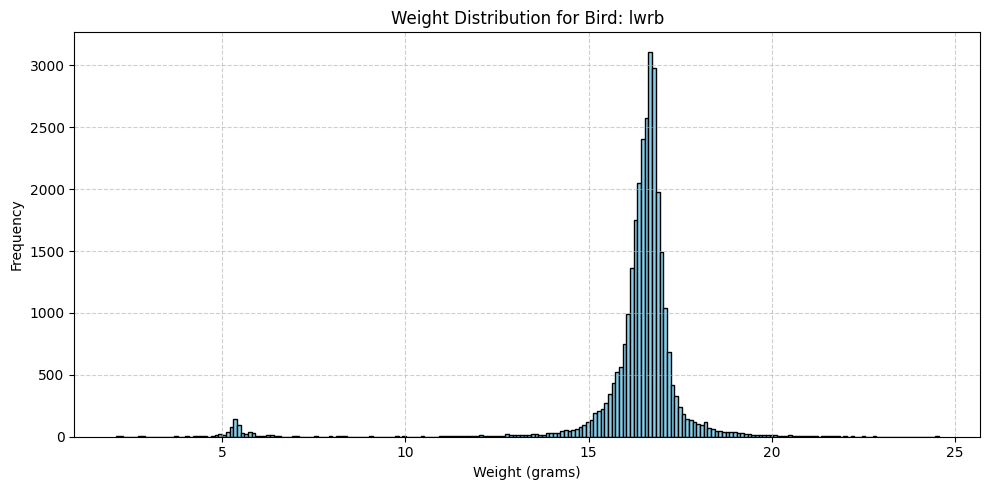

5: ly2rp9
--- Dataset for bird 'ly2rp9' ---
Shape: (686456, 2)
Date range: 2025-06-10 11:19:04 → 2025-06-20 10:00:50
Weight range: 0.00g → 2759.68g

Counts per weight bin:
0g: 494065 samples
0–2g: 18998 samples
2–4g: 31 samples
4–8g: 75 samples
8–12g: 212 samples
12–20g: 172547 samples
20–25g: 217 samples
>25g: 41 samples

Mode weight of whole data: 0.00g
Median weight of whole data: 0.00g

Mode weight of filtered data: 16.62g
Median weight of filtered data: 16.82g

Real mean weight: 18.67g
Real std weight: 0.22g


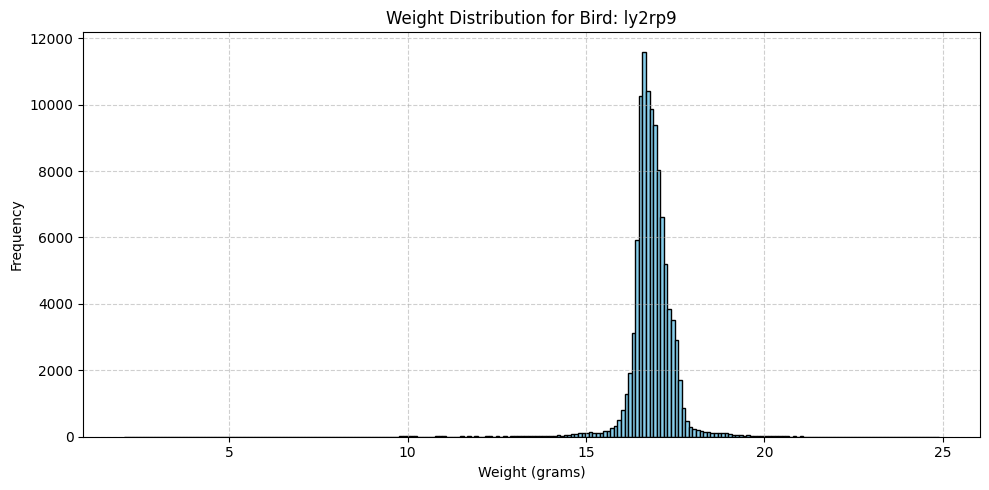

6: ro
--- Dataset for bird 'ro' ---
Shape: (686353, 2)
Date range: 2025-06-10 11:19:04 → 2025-06-20 10:00:50
Weight range: 0.00g → 884.00g

Counts per weight bin:
0g: 105161 samples
0–2g: 227454 samples
2–4g: 34 samples
4–8g: 72 samples
8–12g: 293 samples
12–20g: 344574 samples
20–25g: 8054 samples
>25g: 418 samples

Mode weight of whole data: 0.00g
Median weight of whole data: 18.22g

Mode weight of filtered data: 19.04g
Median weight of filtered data: 19.02g

Real mean weight: 18.32g
Real std weight: 0.39g


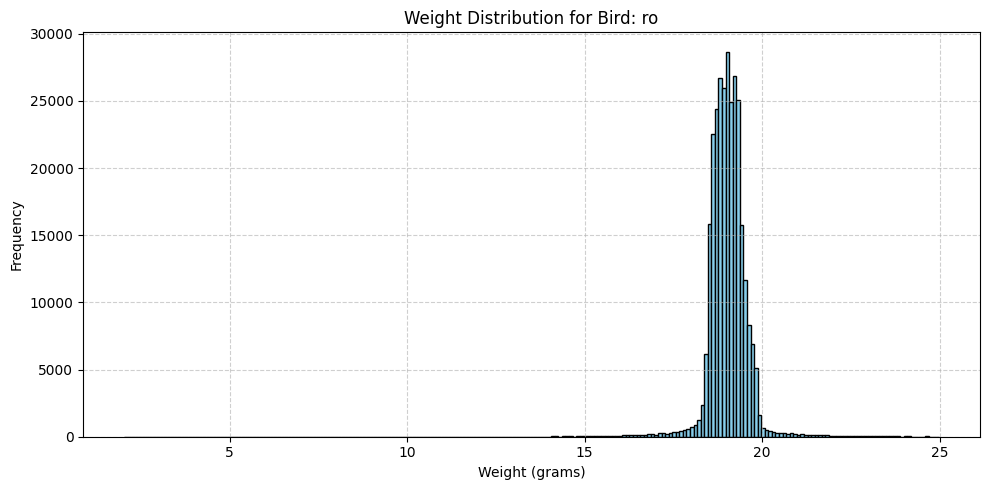

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path

def describe_bird_data(filename, start_date=None, end_date=None, start_time=None, end_time=None):
    # Construct filename
    filename = f"a_{bird_name}_weight_report.csv"
    
    # Check if file exists
    if not os.path.exists(filename):
        print(f"File '{filename}' not found.")
        return

    # Load CSV
    df = pd.read_csv(filename)

    # Convert Time if needed
    if 'Time' in df.columns:
        df['Time'] = pd.to_datetime(df['Time'])
    if 'weight' not in df.columns:
        df.rename(columns={df.columns[1]: 'weight'}, inplace=True)

    # Filter out zero or near-zero weights, and weights that are above 40
    low_thrd = 2
    high_thrd = 25
    df_filtered = df[(df['weight'] > low_thrd) & (df['weight'] < high_thrd)].copy()

    #Filter by date range if provided
    if start_date is not None:
        df_filtered = df_filtered[df_filtered['Time'] >= pd.to_datetime(start_date)]
    if end_date is not None:    
        df_filtered = df_filtered[df_filtered['Time'] <= pd.to_datetime(end_date)]

    #Filter by time range if provided
    if start_time is not None:
        df_filtered = df_filtered[df_filtered['Time'].dt.time >= pd.to_datetime(start_time).time()]
    if end_time is not None:
        df_filtered = df_filtered[df_filtered['Time'].dt.time <= pd.to_datetime(end_time).time()]


    weight_data = df_filtered['weight']  # Keep only positive weights


    print(f"--- Dataset for bird '{bird_name}' ---")
    print(f"Shape: {df.shape}")
    print(f"Date range: {df['Time'].min()} → {df['Time'].max()}")
    print(f"Weight range: {df['weight'].min():.2f}g → {df['weight'].max():.2f}g")
    # print("\nBasic statistics:\n", df['weight'].describe())
   
    # Add custom bin counts
    bin_ranges = {
        '0g': (df['weight'] == 0).sum(),
        '0–2g': ((df['weight'] > 0) & (df['weight'] <= 2)).sum(),
        '2–4g': ((df['weight'] > 2) & (df['weight'] <= 4)).sum(),
        '4–8g': ((df['weight'] > 4) & (df['weight'] <= 8)).sum(),
        '8–12g': ((df['weight'] > 8) & (df['weight'] <= 12)).sum(),
        '12–20g': ((df['weight'] > 12) & (df['weight'] <= 20)).sum(),
        '20–25g': ((df['weight'] > 20) & (df['weight'] <= 25)).sum(),
        '>25g': (df['weight'] > 25).sum()
    }

    print("\nCounts per weight bin:")
    for bin_label, count in bin_ranges.items():
        print(f"{bin_label}: {count} samples")


    #print the mode and median of the whole data
    mode_weight = df['weight'].mode()[0] if not df['weight'].mode().empty else None
    median_weight = df['weight'].median() if not df['weight'].empty else None
    print(f"\nMode weight of whole data: {mode_weight:.2f}g")
    print(f"Median weight of whole data: {median_weight:.2f}g")

    # print the mode and the median of the filtered weights
    mode_weight_f = weight_data.mode()[0] if not weight_data.mode().empty else None
    median_weight_f = weight_data.median() if not weight_data.empty else None
    print(f"\nMode weight of filtered data: {mode_weight_f:.2f}g")
    print(f"Median weight of filtered data: {median_weight_f:.2f}g")

    # compare to the real weights from weights_stats
    real_mean = weights_stats[bird_name]['mean']
    real_std = weights_stats[bird_name]['std']
    print(f"\nReal mean weight: {real_mean:.2f}g")
    print(f"Real std weight: {real_std:.2f}g")
    
    # Plot histogram with 0.1g bins
    bin_min = weight_data.min()
    bin_max = weight_data.max()
    bins = int((bin_max - bin_min) / 0.1)

    plt.figure(figsize=(10, 5))
    plt.hist(weight_data, bins=bins, color='skyblue', edgecolor='black')
    plt.xlabel('Weight (grams)')
    plt.ylabel('Frequency')
    plt.title(f'Weight Distribution for Bird: {bird_name}')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Example usage
# filenames = [Path(f).name for f in Path('.').glob('*.csv')]
# print(filenames)

# list all bird names from bird_names except for LLB36 and LLB7RP156
bird_names_here = [bird for bird in bird_names if bird not in ['LLB36', 'LLB7RP156', 'ly9rb25']]
for i, bird_name in enumerate(sorted(bird_names_here)):
    print(f"{i+1}: {bird_name}")
    # describe_bird_data(bird_name, start_date='2025-06-11', start_time='12:00', end_time='16:00')
    describe_bird_data(bird_name, start_date='2025-06-11', end_date='2025-06-19')
# bird_name = bird_names[0]
# describe_bird_data(bird_name)


# 2 - extra snippet for a panel in Supporting Information Figure 4 - 

## Longitudinal plot of bird 5 - example of out of tune perch-scale

Processing /Users/cohenlab/Desktop/bird_scale_experiment/a_llb84b35_weight_report.csv for bird llb84b35
High value range for bird llb84b35: (2822.72, 30.13, 2702.4791344914743, 2822.72)
/Users/cohenlab/Desktop/bird_scale_experiment/figures/llb84b35_long_demo.svg


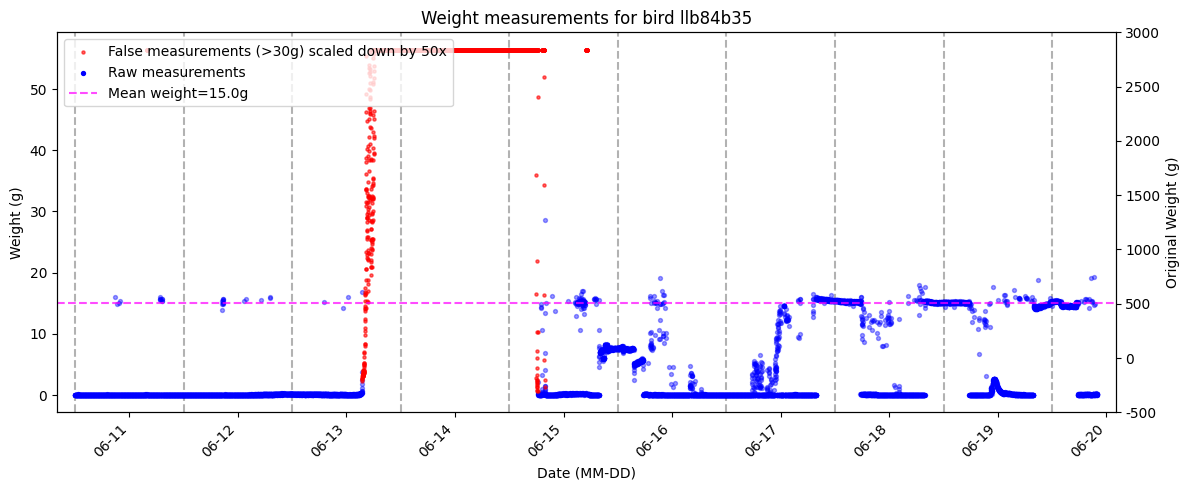

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def plot_longitudinal_simple(
    bird_name,
    weight_report_csv,
    start_date=None,
    end_date=None,
    start_time=None,
    end_time=None,
    low_thrd=1,
    high_thrd=30,
    downsample=1,
    figsize=(14, 6),
    apply_ylim=True,
    ax=None
):
    """
    Plot longitudinal weight data as scatter plot with day shift markers.
    
    Parameters:
        bird_name: str, name of the bird
        weight_report_csv: str, path to CSV file
        start_date: str, start date filter (optional)
        end_date: str, end date filter (optional) 
        start_time: str, start time filter (optional)
        end_time: str, end time filter (optional)
        low_thrd: float, minimum weight threshold
        high_thrd: float, maximum weight threshold
        downsample: int, downsampling factor for scatter points
        figsize: tuple, figure size
        apply_ylim: bool, whether to apply automatic y-limits
        ax: matplotlib axis, optional existing axis to plot on
    
    Returns:
        fig, ax: matplotlib figure and axis objects
    """
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from pipeline import read_timeseries
    
    # Read timeseries data
    df = read_timeseries(
        file_path=weight_report_csv,
        low_thrd=low_thrd,
        high_thrd=high_thrd,
        start_date=start_date,
        end_date=end_date,
        start_time=start_time,
        end_time=end_time,
        keep_out_of_range=True
    )
    df_high = read_timeseries(
        file_path=weight_report_csv,
        low_thrd=high_thrd,
        high_thrd=np.inf,
        start_date=start_date,
        end_date=end_date,
        start_time=start_time,
        end_time=end_time,
        keep_out_of_range=True
    )
    high_value_range = (df_high['weight'].max(), df_high['weight'].min(), df_high['weight'].mean(), df_high['weight'].median())
    print(f"High value range for bird {bird_name}: {high_value_range}")
    # change all weights higher than high_thrd to 35
    # df.loc[df['weight'] > high_thrd, 'weight'] = 35
    df_high.loc[df_high['weight'] > high_thrd, 'weight'] /= 50

    if df.empty:
        print(f"No data found for {bird_name} after filtering.")
        return None, None
    
    # Create date column for day markers
    df['date'] = df['Time'].dt.date.astype(str)
    
    # Prepare plot
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    else:
        fig = ax.figure
    
    # Downsample data for plotting
    df_plot = df.iloc[::downsample]
    df_high = df_high.iloc[::downsample]
    # Scatter plot of raw measurements
    ax.scatter(df_plot['Time'], df_plot['weight'], alpha=0.4, color='blue', s=8)
    # # add the high weights in red
    ax.scatter(df_high['Time'], df_high['weight'], alpha=0.6, color='red', s=5, label='False measurements (>30g) scaled down by 50x')
    # Add one point with full alpha for legend
    if len(df_plot) > 0:
        ax.scatter(df_plot.iloc[0]['Time'], df_plot.iloc[0]['weight'], 
                  alpha=1, label='Raw measurements', color='blue', s=8)
    
    # Add vertical lines for day shifts
    unique_days = sorted(df['date'].unique())
    for day in unique_days:
        day_start = pd.to_datetime(day)
        ax.axvline(day_start, color='black', linestyle='--', alpha=0.3, zorder=0)
    
    # Add horizontal line for mean weight
    mean_weight = 15.0  # Example mean weight, replace with actual if available
    ax.axhline(mean_weight, color='magenta', linestyle='--', alpha=0.7, label=f'Mean weight={mean_weight}g')

    # Set x-axis ticks to show dates
    day_centers = [pd.to_datetime(day) + pd.Timedelta(hours=12) for day in unique_days]
    ax.set_xticks(day_centers)
    ax.set_xticklabels([day.split('-')[1] + '-' + day.split('-')[2] for day in unique_days], 
                       rotation=45, ha='right')
    
    # Set x-axis limits with padding
    if not df['Time'].empty:
        ax.set_xlim(df['Time'].min() - pd.Timedelta(hours=4), 
                   df['Time'].max() + pd.Timedelta(hours=4))
    
    # Set y-axis limits based on data range
    if apply_ylim and not df['weight'].empty:
        weight_mean = df['weight'].mean()
        ax.set_ylim(weight_mean * 0.75, weight_mean * 1.25)
    
    ax.set_xlabel('Date (MM-DD)')
    ax.set_ylabel('Weight (g)')
    ax.set_title(f'Weight measurements for bird {bird_name}')
    ax.legend(loc='upper left')
    # ax.grid(True, linestyle='--', alpha=0.3)

    # Add secondary axis for original high weights (adjusted labels)
    ax2 = ax.twinx()
    ax2.set_ylim(ax.get_ylim())  # Match the primary y-axis limits
    ax2.set_ylabel('Original Weight (g)')
    ax2.set_yticks(ax.get_yticks())
    ax2.set_yticklabels([f"{int(ytick * 50)}" for ytick in ax.get_yticks()])  # Scale labels by 50

    plt.tight_layout()
    return fig, ax

# # Basic plot
# fig, ax = plot_longitudinal_simple('ro', 'a_ro_weight_report.csv')
bird_name = 'llb84b35'
weight_report_csv = f"a_{bird_name}_weight_report.csv"
file_path = Path(weight_report_csv).absolute()
print(f"Processing {file_path} for bird {bird_name}")
# With date filtering and downsampling
fig, ax = plot_longitudinal_simple(
    bird_name, 
    weight_report_csv,
    low_thrd= -1,
    start_date= '2025-06-11',
    end_date=None, 
    downsample=40,
    figsize=(12, 5),
    apply_ylim=False,
)

# save to svg
fig_save_name = Path(f"figures/{bird_name}_long_demo.svg")
print(fig_save_name.absolute())
plt.savefig(fig_save_name, bbox_inches='tight', dpi=300, format='svg')

# 3. Weight measurements distribution analysis

In [ ]:
# This script processes bird weight data from multiple CSV files, bins the weights, and plots the mean number of samples per weight bin across different birds.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define bins: 0–2, 2–4, ..., 18–20, >20
# bin_edges = np.arange(0, 22, 1)
# apply alternative bin edges - [0-1, 2-12, 12-15, 15-20, 20-25]
bin_edges = [0, 1, 10, 15, 20, 25]

bin_labels = [f"{bin_edges[i]}–{bin_edges[i+1]}" for i in range(len(bin_edges)-1)] + [">25"]

# Collect bin counts for each bird
all_bin_counts = []

for bird_name in bird_names:
    # Load data
    filename = f"a_{bird_name}_weight_report.csv"
    df = pd.read_csv(filename)
    if 'weight' not in df.columns:
        df.rename(columns={df.columns[1]: 'weight'}, inplace=True)
    weights = df['weight']

    # Bin the weights
    counts, _ = np.histogram(weights, bins=np.append(bin_edges, np.inf))
    all_bin_counts.append(counts)

# Create DataFrame: rows=birds, columns=bins
bin_counts_df = pd.DataFrame(all_bin_counts, columns=bin_labels, index=bird_names)
# # print non-averaged bin counts
# print("Non-averaged bin counts:")
# print(bin_counts_df)
# Compute mean number of samples per bin
mean_counts = bin_counts_df.mean(axis=0)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(bin_labels, mean_counts, color='skyblue', edgecolor='black', alpha=0.7, label='Mean Counts', width=0.4, align='center')
# plt.plot(bin_labels, mean_counts, marker='o')
plt.yscale('log')
plt.xlabel('Weight Bin (g)')
plt.ylabel('Mean Number of Samples (log scale)')
plt.title('Mean Number of Samples per Weight Bin Across Birds')
plt.tight_layout()

# fig_save_name = Path('figures/weight_bin_distribution.svg')
# plt.savefig(fig_save_name, bbox_inches='tight', dpi=300, format='svg')

plt.show()


Percentage of samples per bin for each bird:
                 0–1      1–10     10–15      15–20     20–25        >25
ly2rp9     74.766754  0.028418  0.166573  25.000510  0.031770   0.005975
llb84b35   62.322662  5.844777  3.849529   9.615586  0.009038  18.358407
lp114w8rb  65.147852  5.230373  0.138021  28.378128  0.925485   0.180142
lwrb       89.245096  0.132853  0.191594  10.403556  0.024338   0.002562
lp92llb8   69.467518  0.271737  0.536768  29.491747  0.210654   0.021576
ro         48.473894  0.033816  0.125208  50.108591  1.197417   0.061073
/Users/cohenlab/Desktop/bird_scale_experiment/figures/perc_samples_per_weight_bin.svg


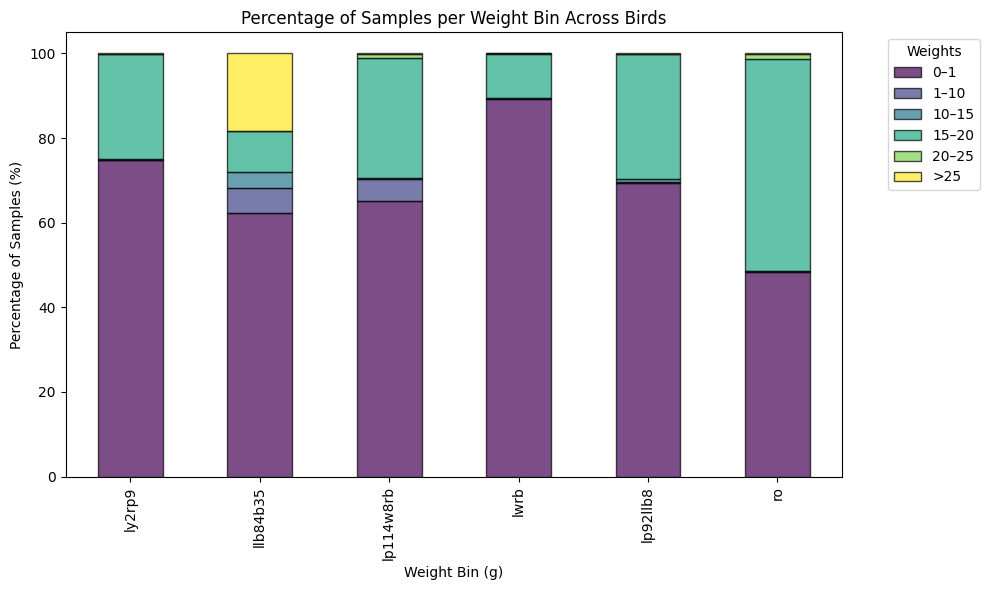

In [100]:
# calculate the percentage of samples in each bin for each bird
total_samples = bin_counts_df.sum().sum()
percentage_counts = (mean_counts / total_samples) * 100
# # Print the mean counts and percentages
# print("\nMean counts per bin:")
# print(mean_counts)
# print("\nPercentage of samples per bin:")
# print(percentage_counts)

# calculate the percentage of samples in each bin for each bird
percentage_counts_per_bird = bin_counts_df.div(bin_counts_df.sum(axis=1), axis=0) * 100
# Print the percentage counts for each bird
print("\nPercentage of samples per bin for each bird:")
print(percentage_counts_per_bird)

# Plot the percentage counts for each bird
plt.figure(figsize=(10, 6))
percentage_counts_per_bird.plot(kind='bar', stacked=True, colormap='viridis',
                                edgecolor='black', alpha=0.7, width=0.5, ax=plt.gca())
plt.xlabel('Weight Bin (g)')
plt.ylabel('Percentage of Samples (%)')
plt.title('Percentage of Samples per Weight Bin Across Birds')
plt.legend(title='Weights', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# fig_save_name = Path('figures/perc_samples_per_weight_bin.svg')
# print(fig_save_name.absolute())
# plt.savefig(fig_save_name, bbox_inches='tight', dpi=300, format='svg')
plt.show()



# 4. Snippet of longitudinal data from bird 'ro' for figure 5 panel c

(42469, 2)
Start weight: 19.30g, Minimum weight: 18.51g, End weight: 19.39g
Number of stable weights: 4081
Manual weight for ro on 2025-06-14 20:00: 18.13g
/Users/cohenlab/Desktop/bird_scale_experiment/figures/ro_weight_measurements_2025-06-14 20:00.svg


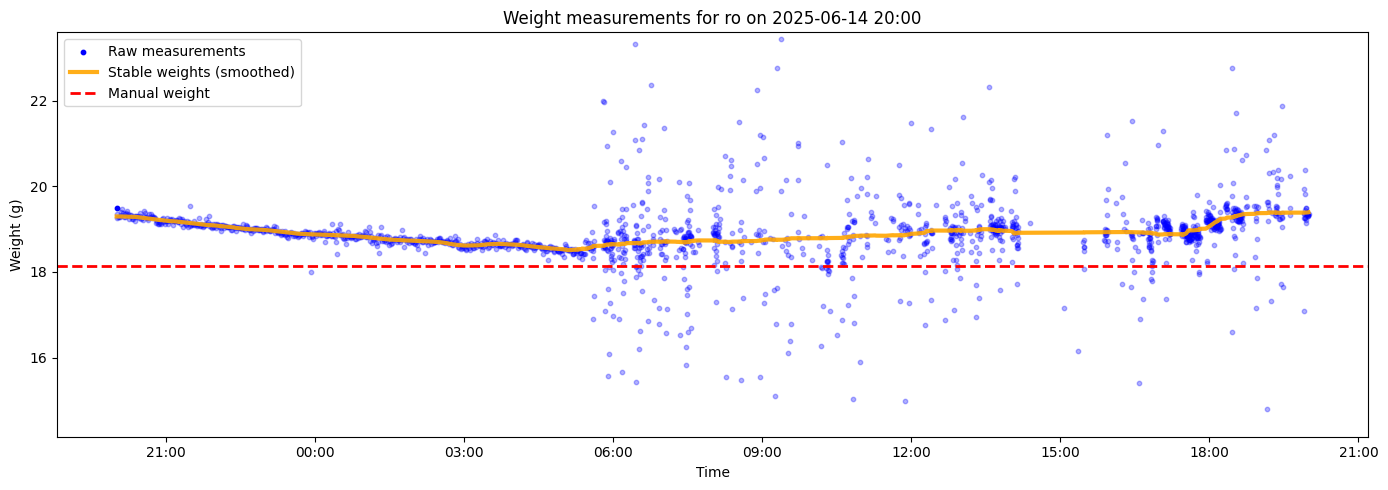

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from pathlib import Path
import matplotlib.dates as mdates
from pipeline import read_timeseries
from analyze_reliable_weight import calc_reliable_measure
# --- User adjustable parameters ---
bird_name = 'ro'  # Change to your bird name
weight_report_csv = f"a_{bird_name}_weight_report.csv"  # Change to your file
weights_file = "weights.csv"
start_date = '2025-06-14 20:00'   # Change to your date
end_date = '2025-06-15 20:00'  # Change to your date
start_time = None  # Optional, if you want to filter by time
end_time = None    # Optional, if you want to filter by time
low_thrd = 1
high_thrd = 50
win_size = 10
step = 10
std_percentile = None
weight_fraction = 0.09
raw_downsample = 12
rel_downsample = 10
figsize = (14, 5)
# --- End user parameters ---

# Read timeseries data for the day
df = read_timeseries(
    weight_report_csv,
    low_thrd=low_thrd,
    high_thrd=high_thrd,
    start_date=start_date,
    end_date=end_date,
    start_time=start_time,
    end_time=end_time
)
if df.empty:
    print("No data found for the specified day.")
    exit()
print(df.shape)
# Calculate reliable weights, use default parameters
rel = calc_reliable_measure(
    df[df['weight'] > 1],  # Filter out zero weights
    win_size=win_size,
    step=step,
    std_percentile=std_percentile,
    weight_fraction=weight_fraction,
    tolerance_fraction=0.3,
    reference_weight=None
)

# Read manual weights
weights_df = pd.read_csv(weights_file, index_col=0)
if start_date is not None:
    manual_weight = weights_df.loc[bird_name, pd.to_datetime(start_date).strftime('%Y-%m-%d')]
else:
    start_date = df['Time'].dt.date.min() + pd.Timedelta(days=1)
    end_date = df['Time'].dt.date.max()
    manual_weight = weights_df.loc[bird_name, pd.to_datetime(start_date).strftime('%Y-%m-%d')]


# Plot
plt.figure(figsize=figsize)
df_plot = df.iloc[::raw_downsample]
# Plot one point with full alpha for label visibility
plt.scatter(df_plot.iloc[1]['Time'], df_plot.iloc[1]['weight'], alpha=1, label='Raw measurements', color='blue', s=10)
plt.scatter(df_plot['Time'][:2400:4], df_plot['weight'][:2400:4], alpha=0.3, color='blue', s=10)
plt.scatter(df_plot['Time'][2400::], df_plot['weight'][2400::], alpha=0.3, color='blue', s=10)


smooth_win = 200  # You can change this value

## plot smoothed raw weights as a line
# df_plot['Weight_smooth'] = df_plot['weight'].rolling(window=smooth_win, center=True, min_periods=1).mean()
# plt.plot(pd.to_datetime(df_plot['Time']), df_plot['Weight_smooth'], color='black', linewidth=2, alpha=0.9, label='Raw weights (smoothed)')

if not rel.empty:
    rel['Weight_smooth'] = rel['Weight'].rolling(window=smooth_win, center=True, min_periods=1).mean()
    start_weight = rel['Weight_smooth'].iloc[0] if not rel['Weight_smooth'].empty else None
    minimum_weight = rel['Weight_smooth'].min() if not rel['Weight_smooth'].empty else None
    end_weight = rel['Weight_smooth'].iloc[-1] if not rel['Weight_smooth'].empty else None
    rel_plot = rel.iloc[::rel_downsample]
    # plt.scatter(pd.to_datetime(rel_plot['Time']), rel_plot['Weight'], color='orange', s=7, alpha=0.7, label='Reliable measurements', zorder=3)
    # Plot smoothed reliable weights as a line
    plt.plot(pd.to_datetime(rel['Time']), rel['Weight_smooth'], color='orange', linewidth=3, alpha=0.9, label=f'Stable weights (smoothed)')

if start_weight and minimum_weight and end_weight:
    print(f"Start weight: {start_weight:.2f}g, Minimum weight: {minimum_weight:.2f}g, End weight: {end_weight:.2f}g")
print(f"Number of stable weights: {len(rel)}")
# rel_plot = rel.iloc[::rel_downsample]
# plt.scatter(pd.to_datetime(rel_plot['Time']), rel_plot['Weight'], color='orange', s=7, alpha=0.7, label='Reliable measurements', zorder=3)

# Plot manual weight as a horizontal line or marker
if manual_weight:
    plt.axhline(manual_weight, color='red', linestyle='--', linewidth=2, label='Manual weight')
    print(f"Manual weight for {bird_name} on {start_date}: {manual_weight:.2f}g")
    # plt.text(df['Time'].iloc[len(df)//2], manual_weight, f'Manual: {manual_weight:.2f}g', color='red', va='bottom')
    
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# set y-axis limits to be +/- of the mean weight
if not rel.empty:
    plt.ylim(rel['Weight'].mean() * 0.75, rel['Weight'].mean() * 1.25)
else:
    if not df.empty:
        plt.ylim(df['weight'].mean() * 0.8, df['weight'].mean() * 1.2)


plt.xlabel('Time')
plt.ylabel('Weight (g)')
plt.title(f'Weight measurements for {bird_name} on {start_date}')
plt.legend()
plt.tight_layout()

# save figure
fig_save_name = Path(f'figures/{bird_name}_weight_measurements_{start_date}.svg')
print(fig_save_name.absolute())
# plt.savefig(fig_save_name, bbox_inches='tight', dpi=300, format='svg')

# 4. Plot Daily Data (Figure 3)

(36468, 2)
Number of stable weights: 1462
Mean value of stable weights: 16.394860465116277
Median value of stable weights: 19.129
Mode value of stable weights: [19.018 19.545]

Number of stable weights (filtered): 1224
Mean value of stable weights (filtered): 19.2041658496732
Median value of stable weights (filtered): 19.198999999999998
Mode value of stable weights (filtered): [18.99  19.162 19.213 19.223]

Mode weight of whole data: 0.00g
Median weight of whole data: 0.00g
Mean weight of whole data: 6.80g


Mode weight of filtered data: 19.05g
Median weight of filtered data: 19.21g
Mean weight of filtered data: 19.20g

Histogram bin size: 0.1


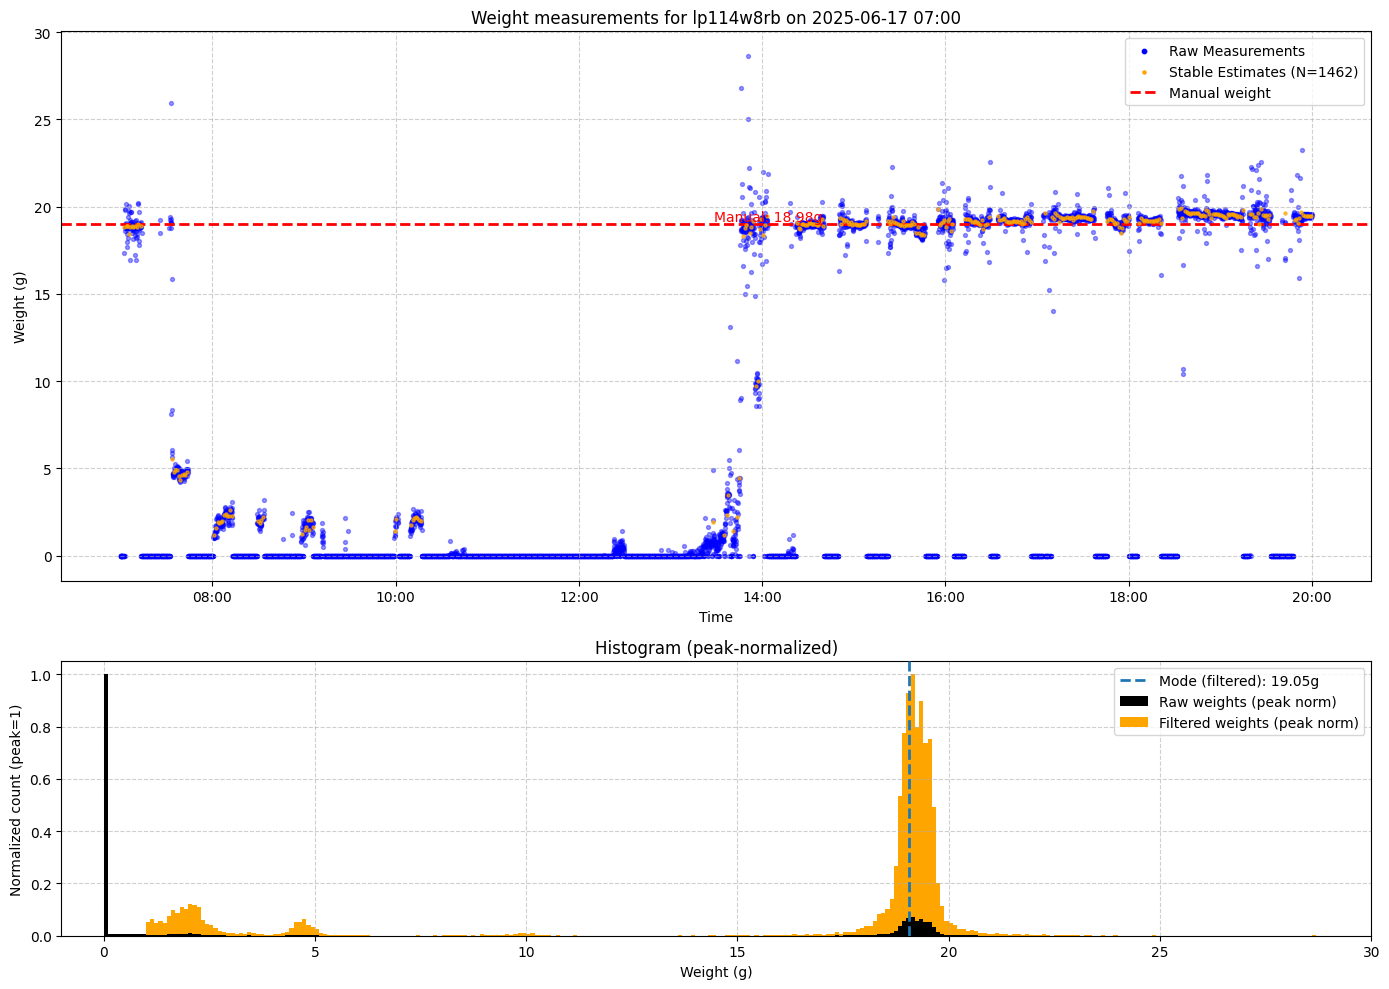

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from pathlib import Path
from matplotlib import dates as mdates
from pipeline import read_timeseries
from analyze_reliable_weight import calc_reliable_measure

# --- User adjustable parameters ---
bird_name = "lp114w8rb"  # Change to your bird name
weight_report_csv = f"a_{bird_name}_weight_report.csv"  # Change to your file
weights_file = "weights.csv"
start_date = '2025-06-17 07:00'   # Change to your date
end_date = '2025-06-17 20:00'
start_time = None # Optional, if you want to filter by time
end_time = None  # Optional, if you want to filter by time
low_thrd = 0
high_thrd = 30
win_size = 10
step = 10
std_percentile = None
weight_fraction = 0.09
raw_downsample = 5
rel_downsample = 5
figsize = (14, 10)  # Double height for two subplots
# --- End user parameters ---

# Read timeseries data for the day
df = read_timeseries(
    weight_report_csv,
    low_thrd=low_thrd,
    high_thrd=high_thrd,
    start_date=start_date,
    end_date=end_date,
    start_time=start_time,
    end_time=end_time
)
if df.empty:
    print("No data found for the specified day.")
    exit()
print(df.shape)

# Read manual weights
weights_df = pd.read_csv(weights_file, index_col=0)
if start_date is not None:
    manual_weight = weights_df.loc[bird_name, pd.to_datetime(start_date).strftime('%Y-%m-%d')]
else:
    start_date = df['Time'].dt.date.min() + pd.Timedelta(days=1)
    end_date = df['Time'].dt.date.max()
    manual_weight = weights_df.loc[bird_name, pd.to_datetime(start_date).strftime('%Y-%m-%d')]

# Calculate reliable weights, use default parameters
rel = calc_reliable_measure(
    df[df['weight'] > 1],  # Filter out zero weights
    win_size=win_size,
    step=step,
    std_percentile=std_percentile,
    weight_fraction=weight_fraction,
    tolerance_fraction=0.3,
    reference_weight=manual_weight
)
print(f"Number of stable weights: {len(rel)}")
print(f"Mean value of stable weights: {rel['Weight'].mean() if not rel.empty else 'N/A'}")
print(f"Median value of stable weights: {rel['Weight'].median() if not rel.empty else 'N/A'}")
print(f"Mode value of stable weights: {rel['Weight'].mode().values if not rel.empty else 'N/A'}\n")

df_filtered = df[(df['weight'] > 0.7*manual_weight) & (df['weight'] < 1.3*manual_weight)]
rel_filtered = calc_reliable_measure(
    df_filtered,
    win_size=win_size,
    step=step,
    std_percentile=std_percentile,
    weight_fraction=weight_fraction,
    tolerance_fraction=0.3,
    reference_weight=manual_weight
)
print(f"Number of stable weights (filtered): {len(rel_filtered)}")
print(f"Mean value of stable weights (filtered): {rel_filtered['Weight'].mean() if not rel_filtered.empty else 'N/A'}")
print(f"Median value of stable weights (filtered): {rel_filtered['Weight'].median() if not rel_filtered.empty else 'N/A'}")
print(f"Mode value of stable weights (filtered): {rel_filtered['Weight'].mode().values if not rel_filtered.empty else 'N/A'}")

# print mean, mode and median of unfiltered data (df)
mode_weight = df['weight'].mode()[0] if not df['weight'].mode().empty else None
median_weight = df['weight'].median() if not df['weight'].empty else None
mean_weight = df['weight'].mean() if not df['weight'].empty else None
print(f"\nMode weight of whole data: {mode_weight:.2f}g")
print(f"Median weight of whole data: {median_weight:.2f}g")
print(f"Mean weight of whole data: {mean_weight:.2f}g\n")

# print mean, mode and median of filtered data
mode_weight_f = df_filtered['weight'].mode()[0] if not df_filtered['weight'].mode().empty else None
median_weight_f = df_filtered['weight'].median() if not df_filtered['weight'].empty else None
mean_weight_f = df_filtered['weight'].mean() if not df_filtered['weight'].empty else None
print(f"\nMode weight of filtered data: {mode_weight_f:.2f}g")
print(f"Median weight of filtered data: {median_weight_f:.2f}g")
print(f"Mean weight of filtered data: {mean_weight_f:.2f}g\n")

# Plot: scatter and histogram as subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=figsize, sharex=False, gridspec_kw={'height_ratios': [2, 1]})

# --- Scatter plot --- with additional single point for label visibility
df_plot = df.iloc[::raw_downsample]
ax1.scatter(df_plot['Time'], df_plot['weight'], alpha=0.4, color='blue', s=8)
ax1.scatter(df_plot.iloc[1]['Time'], df_plot.iloc[1]['weight'], alpha=1, label='Raw Measurements', color='blue', s=10)


rel_plot = rel.iloc[::rel_downsample]
ax1.scatter(pd.to_datetime(rel_plot['Time']), rel_plot['Weight'], color='orange', s=5, alpha=0.7, zorder=3)
ax1.scatter(pd.to_datetime(rel_plot.iloc[1]['Time']), rel_plot.iloc[1]['Weight'], color='orange', s=5, alpha=1, label=f'Stable Estimates (N={len(rel)})', zorder=3)

# Plot manual weight as a horizontal line or marker
if not pd.isna(manual_weight):
    ax1.axhline(manual_weight, color='red', linestyle='--', linewidth=2, label='Manual weight')
    ax1.text(df['Time'].iloc[len(df)//2], manual_weight, f'Manual: {manual_weight:.2f}g', color='red', va='bottom')

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax1.set_xlabel('Time')
ax1.set_ylabel('Weight (g)')
ax1.set_title(f'Weight measurements for {bird_name} on {start_date}')
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.6)

######################### ------------------- #########################
# --- Histogram with peak normalization ---
weights_for_hist = df['weight'].dropna()
df_hist_filtered = df[df['weight'] > 1]
weights_filtered = df_hist_filtered['weight'].dropna()

# # print mean, mode and median of filtered data
# mode_weight_f = weights_filtered.mode()[0] if not weights_filtered.mode().empty else None
# median_weight_f = weights_filtered.median() if not weights_filtered.empty else None
# mean_weight_f = weights_filtered.mean() if not weights_filtered.empty else None
# print(f"\nMode weight of filtered data: {mode_weight_f:.2f}g")
# print(f"Median weight of filtered data: {median_weight_f:.2f}g")
# print(f"Mean weight of filtered data: {mean_weight_f:.2f}g")
# Define bins for histogram
bins = np.arange(min(weights_for_hist.min(), weights_filtered.min()),
                 max(weights_for_hist.max(), weights_filtered.max()) + 0.1, 0.1)
print(f"Histogram bin size: {bins[1] - bins[0]}")
# Raw histogram
raw_counts, _ = np.histogram(weights_for_hist, bins=bins)
raw_counts = raw_counts / raw_counts.max()  # normalize to peak 1

# Filtered histogram
filtered_counts, _ = np.histogram(weights_filtered, bins=bins)
filtered_counts = filtered_counts / filtered_counts.max()  # normalize to peak 1

bin_centers = (bins[:-1] + bins[1:]) / 2
ax2.bar(bin_centers, raw_counts, color='black', label='Raw weights (peak norm)', width=0.1, zorder=2)
ax2.bar(bin_centers, filtered_counts, color='orange', label='Filtered weights (peak norm)', width=0.1, zorder=1)
ax2.set_xlim(-1, 30)
ax2.set_xlabel('Weight (g)')
ax2.set_ylabel('Normalized count (peak=1)')
ax2.set_title('Histogram (peak-normalized)')

# Add mode estimate for filtered (orange) data
if not weights_filtered.empty:
    mode_filtered = weights_filtered.mode().iloc[0]
    ax2.axvline(mode_filtered, color='#1f77b4', linestyle='--', linewidth=2, label=f'Mode (filtered): {mode_filtered:.2f}g', zorder=10)

ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

fig_save_name = Path(f'figures/single_day_{bird_name}_17_06_25.svg')
plt.savefig(fig_save_name, bbox_inches='tight', dpi=300, format='svg')

plt.show()

# 3.2 Single bird summary statistics

In [ ]:
import pandas as pd
import numpy as np
from pipeline import read_timeseries
from analyze_reliable_weight import calc_reliable_measure

# --- User adjustable parameters ---
bird_name = "lp114w8rb"  # Change to your bird name
weight_report_csv = f"a_{bird_name}_weight_report.csv"
start_date = '2025-06-17'
end_date = '2025-06-19'
start_time = '08:00'
end_time = '18:00'
low_thrd = 0
high_thrd = 50
win_size = 10
step = 2
std_percentile = None
weight_fraction = 0.05
# --- End user parameters ---

# Read timeseries data for the date range
df = read_timeseries(
    weight_report_csv,
    low_thrd=low_thrd,
    high_thrd=high_thrd,
    start_date=start_date,
    end_date=end_date,
    start_time=start_time,
    end_time=end_time
)
if df.empty:
    print("No data found for the specified period.")
else:
    # Unfiltered (but weight > 1g)
    df_unfilt = df[df['weight'] > 1]
    unfilt_weights = df_unfilt['weight'].dropna()
    unfilt_mean = unfilt_weights.mean()
    unfilt_mode = unfilt_weights.mode().iloc[0] if not unfilt_weights.mode().empty else np.nan
    unfilt_std = unfilt_weights.std()
    unfilt_count = unfilt_weights.count()

    # Reliable weights
    rel = calc_reliable_measure(
        df_unfilt,
        win_size=win_size,
        step=step,
        std_percentile=std_percentile,
        weight_fraction=weight_fraction,
        reference_weight=None
    )
    rel_weights = rel['Weight'].dropna()
    rel_mean = rel_weights.mean()
    rel_mode = rel_weights.mode().iloc[0] if not rel_weights.mode().empty else np.nan
    rel_std = rel_weights.std()
    rel_count = rel_weights.count()

    # Print comparison
    summary_df = pd.DataFrame({
        'mean': [unfilt_mean, rel_mean],
        'mode': [unfilt_mode, rel_mode],
        'std': [unfilt_std, rel_std],
        'count': [unfilt_count, rel_count]
    }, index=['Unfiltered (>1g)', 'Reliable'])
    print(f"Summary statistics for {bird_name} from {start_date} to {end_date}:")
    print(summary_df)

# 4 - summary analysis

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
# read all_birds_summary.csv
summary_df = pd.read_csv('all_birds_summary.csv', index_col=0)
print("\nAll birds summary statistics:")
print(summary_df)
print(summary_df.columns)
print(len(summary_df))
# Calculate the mean counts overall
mean_counts = summary_df['stable_count'].mean()
print(f"\nMean counts overall: {mean_counts}")

# Calculate the std of true weights per bird based on the column 'true_weights', use groupby on bird_name
true_weights = summary_df['true_weight'].dropna()
std_true_weights = summary_df.groupby('bird_name')['true_weight'].std()
print(std_true_weights)
print(std_true_weights.mean())
# print(f"Standard deviation of true weights: {std_true_weights:.2f}")



All birds summary statistics:
            stable_median  stable_mode  stable_mean  stable_std  stable_count  \
date                                                                            
2025-06-11        18.8460       19.192    18.728231    0.394648            52   
2025-06-12        16.5320       14.904    16.669068    0.814834            44   
2025-06-13        15.3090       15.080    15.992150    1.258906           113   
2025-06-14        17.2700       17.195    17.281257    0.260075          1466   
2025-06-15        16.9280       16.831    16.926742    0.274644          1860   
2025-06-16        17.2420       16.244    17.205244    0.527645            41   
2025-06-17        16.9400       16.607    16.976280    0.413132          1987   
2025-06-18        16.6130       16.570    16.635357    0.242335          4679   
2025-06-19        17.0270       16.430    16.949693    0.390406          4959   
2025-06-20        16.8440       16.862    16.805532    0.234592          1987 

In [2]:
# Compare the accuracy of the stable_median, stable_mean, and stable_mode to the true_weights
summary_df['median_error'] = (summary_df['stable_median'] - summary_df['true_weight']).abs()
summary_df['mean_error'] = (summary_df['stable_mean'] - summary_df['true_weight']).abs()
summary_df['mode_error'] = (summary_df['stable_mode'] - summary_df['true_weight']).abs()
mean_median_error = summary_df['median_error'].mean()
mean_mean_error = summary_df['mean_error'].mean()
mean_mode_error = summary_df['mode_error'].mean()
print(f"\nMean absolute error of stable median: {mean_median_error:.2f}g")
print(f"Mean absolute error of stable mean: {mean_mean_error:.2f}g")
print(f"Mean absolute error of stable mode: {mean_mode_error:.2f}g")


Mean absolute error of stable median: 0.71g
Mean absolute error of stable mean: 0.70g
Mean absolute error of stable mode: 0.96g


In [43]:
# Calculate MAE for stable_mean and mode_estimate as estimates for true_weight, per day across all birds
# Step 1 : Prepare the data
import numpy as np

# generate final product for analysis for all birds
valid = summary_df[['stable_mean', 'mode_estimate', 'true_weight', 'bird_name']].dropna()
print(valid.shape)

# Same analysis but remove birds according to "birds_to_remove" list
birds_to_remove = ['ly2rp9']
filtered_summary_df = summary_df[~summary_df['bird_name'].isin(birds_to_remove)]
valid_filtered = filtered_summary_df[['stable_mean', 'mode_estimate', 'true_weight', 'bird_name']].dropna()
print(valid_filtered.shape)

# And for a single bird
bird_name = 'ro'
bird_summary = summary_df[summary_df['bird_name'] == bird_name]
valid_bird = bird_summary[['stable_mean', 'mode_estimate', 'true_weight', 'bird_name']].dropna()
print(valid_bird.shape)


(56, 4)
(46, 4)
(10, 4)


In [72]:
# Step 2 : Calulate the accuracy metrics for each method
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, r2_score
from scipy.stats import pearsonr

# Assuming your daily table is already loaded into daily_df with:
# columns: ['stable_mean', 'mode_estimate', 'true_weight']
# index: date

# Prepare a results list
metrics = []
daily_df = valid.copy()  # Use the valid_bird DataFrame from the previous analysis
daily_df_filtered = valid_filtered.copy()  # Use the valid_bird DataFrame from the previous analysis
daily_df_single_bird = valid_bird.copy()  # Use the valid_bird DataFrame from the previous analysis
all_dfs = [daily_df, daily_df_filtered, daily_df_single_bird]

names = ['All_Birds', 'Filtered_Birds', 'Single_Bird']

for df, name in list(zip(all_dfs, names)):
    # Ensure all methods are present in the DataFrame
    if 'stable_mean' not in df.columns or 'mode_estimate' not in df.columns or 'true_weight' not in df.columns:
        print("Required columns are missing from the DataFrame.")
        continue
    print(f"Accuracy metrics for {name}:")

    # Calculate metrics for each method
    for method in ['stable_mean', 'mode_estimate']:
        y_true = df['true_weight']
        y_pred = df[method]
        
        # Mean Absolute Error
        mae = mean_absolute_error(y_true, y_pred)
        
        # Bias (mean signed error)
        bias = np.mean(y_pred - y_true)
        
        # R² score (can be negative if worse than mean baseline)
        r2 = r2_score(y_true, y_pred)
        
        # Pearson correlation and p-value
        r, p_val = pearsonr(y_pred, y_true)
        
        # Mean Absolute Percentage Error (% of true weight)
        mae_percent = np.mean(np.abs((y_pred - y_true) / y_true)) * 100
        
        metrics.append({
            'Dataset': name,
            'Method': method,
            'MAE (g)': mae,
            'MAE (% of true)': mae_percent,
            'Bias (g)': bias,
            'R² (sklearn)': r2,
            'Pearson r': r,
            'p-value': p_val
        })

# Create a summary DataFrame
results_df = pd.DataFrame(metrics)
print(results_df.round(4))


Accuracy metrics for All_Birds:
Accuracy metrics for Filtered_Birds:
Accuracy metrics for Single_Bird:
          Dataset         Method  MAE (g)  MAE (% of true)  Bias (g)  \
0       All_Birds    stable_mean   0.7014           3.8492   -0.3689   
1       All_Birds  mode_estimate   0.7091           3.9044   -0.3277   
2  Filtered_Birds    stable_mean   0.4851           2.7147   -0.0902   
3  Filtered_Birds  mode_estimate   0.4933           2.7764   -0.0476   
4     Single_Bird    stable_mean   0.6374           3.4941    0.6374   
5     Single_Bird  mode_estimate   0.5900           3.2364    0.5900   

   R² (sklearn)  Pearson r  p-value  
0        0.4980     0.7898   0.0000  
1        0.5186     0.7863   0.0000  
2        0.7849     0.9000   0.0000  
3        0.8022     0.9030   0.0000  
4       -1.8831     0.9190   0.0002  
5       -1.5738     0.8667   0.0012  


In [73]:
metrics = []
for df, name in list(zip(all_dfs, names)):
    if 'stable_mean' not in df.columns or 'mode_estimate' not in df.columns or 'true_weight' not in df.columns:
        print("Required columns are missing from the DataFrame.")
        continue
    print(f"Accuracy metrics for {name}:")

    for method in ['stable_mean', 'mode_estimate']:
        y_true = df['true_weight']
        y_pred = df[method]
        
        mae = mean_absolute_error(y_true, y_pred)
        bias = np.mean(y_pred - y_true)
        r2 = r2_score(y_true, y_pred)
        r, p_val = pearsonr(y_pred, y_true)
        
        # Mean Absolute Percentage Error (% of true weight)
        mae_percent = np.mean(np.abs((y_pred - y_true) / y_true)) * 100
        
        metrics.append({
            'Dataset': name,
            'Method': method,
            'MAE (g)': mae,
            'MAE (% of true)': mae_percent,
            'Bias (g)': bias,
            'R² (sklearn)': r2,
            'Pearson r': r,
            'p-value': p_val
        })

# Create a summary DataFrame
results_df = pd.DataFrame(metrics)
print(results_df.round(4))

Accuracy metrics for All_Birds:
Accuracy metrics for Filtered_Birds:
Accuracy metrics for Single_Bird:
          Dataset         Method  MAE (g)  MAE (% of true)  Bias (g)  \
0       All_Birds    stable_mean   0.7014           3.8492   -0.3689   
1       All_Birds  mode_estimate   0.7091           3.9044   -0.3277   
2  Filtered_Birds    stable_mean   0.4851           2.7147   -0.0902   
3  Filtered_Birds  mode_estimate   0.4933           2.7764   -0.0476   
4     Single_Bird    stable_mean   0.6374           3.4941    0.6374   
5     Single_Bird  mode_estimate   0.5900           3.2364    0.5900   

   R² (sklearn)  Pearson r  p-value  
0        0.4980     0.7898   0.0000  
1        0.5186     0.7863   0.0000  
2        0.7849     0.9000   0.0000  
3        0.8022     0.9030   0.0000  
4       -1.8831     0.9190   0.0002  
5       -1.5738     0.8667   0.0012  


/Users/cohenlab/Desktop/bird_scale_experiment/figures/All_Birds_mode_estimate_vs_true_weight.svg


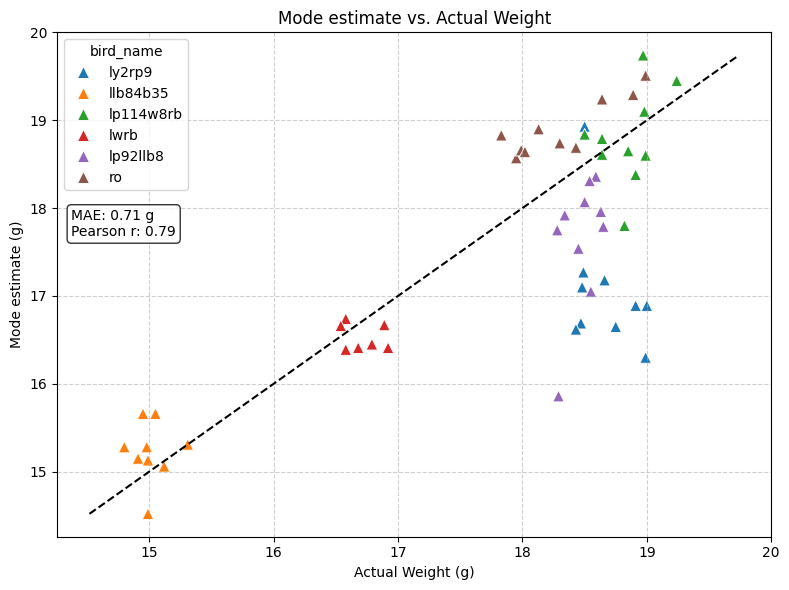

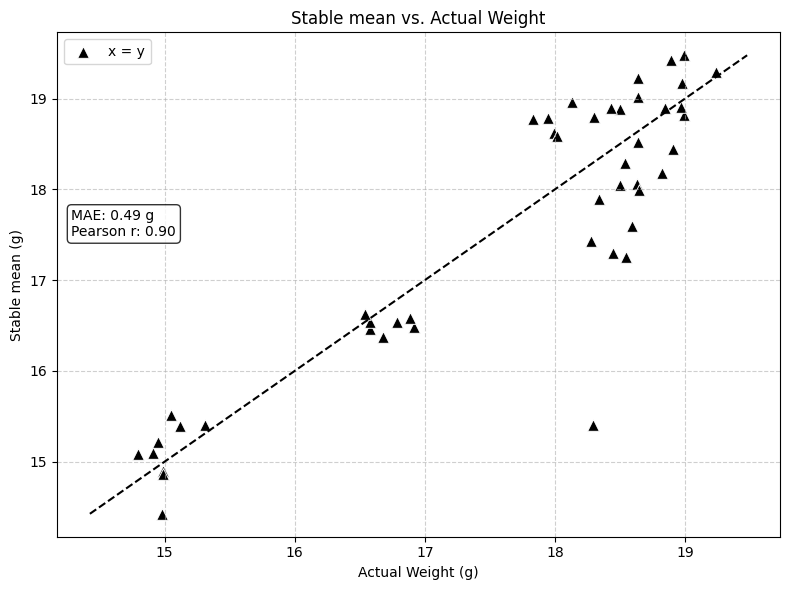

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_estimate_vs_true(df, estimator='mode_estimate', color_by_bird=True, marker='o', accuracy_df=None, dataset_label='All Birds', save_fig=False):
    """
    Plots estimated weight vs. actual (true_weight) with accuracy annotations.

    Parameters:
    - df: pandas DataFrame with weight data
    - estimator: str, the name of the estimator column
    - color_by_bird: bool, whether to color by bird or use single color
    - marker: str, Matplotlib marker style
    - accuracy_df: pandas DataFrame with accuracy metrics (optional)
    - dataset_label: str, which dataset to pull metrics from ('All Birds', etc.)
    """
    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.figure(figsize=(8, 6))

    if color_by_bird:
        sns.scatterplot(data=df, x='true_weight', y=estimator, hue='bird_name', s=70, marker=marker)
    else:
        sns.scatterplot(data=df, x='true_weight', y=estimator, color='black', s=70, marker=marker)

    # Diagonal x = y line
    min_val = min(df['true_weight'].min(), df[estimator].min())
    max_val = max(df['true_weight'].max(), df[estimator].max())
    plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='x = y')

    # Add accuracy annotation from accuracy_df
    if accuracy_df is not None:
        row = accuracy_df[(accuracy_df['Dataset'] == dataset_label) & (accuracy_df['Method'] == estimator)]
        if not row.empty:
            mae = row['MAE (g)'].values[0]
            r = row['Pearson r'].values[0]
            annotation = f"MAE: {mae:.2f} g\nPearson r: {r:.2f}"
            plt.text(0.02, 0.65, annotation, transform=plt.gca().transAxes,
                     verticalalignment='top', bbox=dict(boxstyle="round", facecolor="white", alpha=0.8))

    plt.xlabel('Actual Weight (g)')
    plt.ylabel(f'{estimator.replace("_", " ").capitalize()} (g)')
    plt.title(f'{estimator.replace("_", " ").capitalize()} vs. Actual Weight')
    if not color_by_bird:
        plt.legend(['x = y'])
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()

    # save figure
    if save_fig:
        fig_save_name = Path(f'figures/{dataset_label}_{estimator}_vs_true_weight.svg')
        print(fig_save_name.absolute())
        plt.savefig(fig_save_name, bbox_inches='tight', dpi=300, format='svg')

    plt.show()

  

save_fig = False
plot_estimate_vs_true(daily_df, estimator='mode_estimate', color_by_bird=True, marker='^', accuracy_df=results_df, dataset_label='All_Birds', save_fig=True)
plot_estimate_vs_true(daily_df_filtered, estimator='stable_mean', color_by_bird=False, marker='^', accuracy_df=results_df, dataset_label='Filtered_Birds', save_fig=save_fig)


/Users/cohenlab/Desktop/bird_scale_experiment/figures/stable_mean_normalized_weights_color.svg


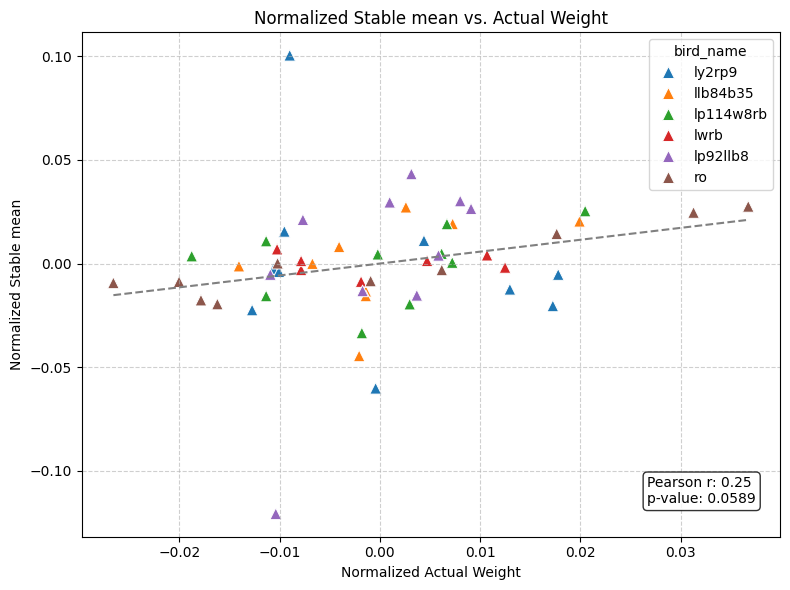

In [79]:
def plot_normalized_weights(df, estimator='mode_estimate', marker='o', color_by_bird=True, fit_line=False, save_fig=False):
    """
    Plots normalized estimated weight vs. normalized actual weight for each bird.

    Parameters:
    - df: pandas DataFrame with 'true_weight', estimator column, and 'bird_name'
    - estimator: str, name of the estimator column (e.g., 'mode_estimate')
    - marker: str, matplotlib marker symbol
    - color_by_bird: bool, whether to color by bird or use one color
    - fit_line: bool, whether to include a regression line
    """
    df_norm = df.copy()

    # Normalize true and estimated weights per bird
    for bird in df['bird_name'].unique():
        idx = df['bird_name'] == bird
        true_mean = df.loc[idx, 'true_weight'].mean()
        est_mean = df.loc[idx, estimator].mean()

        df_norm.loc[idx, 'true_weight_norm'] = (df.loc[idx, 'true_weight'] - true_mean) / true_mean
        df_norm.loc[idx, 'estimate_norm'] = (df.loc[idx, estimator] - est_mean) / est_mean

    # Compute correlation
    r, p = pearsonr(df_norm['true_weight_norm'], df_norm['estimate_norm'])

    # Plot
    plt.figure(figsize=(8, 6))
    if color_by_bird:
        sns.scatterplot(data=df_norm, x='true_weight_norm', y='estimate_norm', hue='bird_name', s=70, marker=marker)
    else:
        sns.scatterplot(data=df_norm, x='true_weight_norm', y='estimate_norm', color='black', s=70, marker=marker)

    # Reference line
    min_val = min(df_norm['true_weight_norm'].min(), df_norm['estimate_norm'].min())
    max_val = max(df_norm['true_weight_norm'].max(), df_norm['estimate_norm'].max())
    # plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='x = y')

    # Fit regression line (optional)
    if fit_line:
        sns.regplot(
            data=df_norm,
            x='true_weight_norm',
            y='estimate_norm',
            scatter=False,
            ci=None,
            color='gray',
            line_kws={'linestyle': '--', 'linewidth': 1.5}
        )

    # Add annotation
    annotation = f"Pearson r: {r:.2f}\np-value: {p:.4f}"
    plt.text(0.81, 0.12, annotation, transform=plt.gca().transAxes,
             verticalalignment='top', bbox=dict(boxstyle="round", facecolor="white", alpha=0.8))

    plt.xlabel('Normalized Actual Weight')
    plt.ylabel(f'Normalized {estimator.replace("_", " ").capitalize()}')
    plt.title(f'Normalized {estimator.replace("_", " ").capitalize()} vs. Actual Weight')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()

    if save_fig:
        if color_by_bird:
            fig_save_name = Path(f'figures/{estimator}_normalized_weights_color.svg')
        else:
            fig_save_name = Path(f'figures/{estimator}_normalized_weights.svg')
        print(fig_save_name.absolute())
        plt.savefig(fig_save_name, bbox_inches='tight', dpi=300, format='svg')

    plt.show()

   

# With color per bird and fit line
# plot_normalized_weights(daily_df_filtered, estimator='mode_estimate', marker='^', color_by_bird=True, fit_line=True)

# With single color and no fit line
plot_normalized_weights(daily_df, estimator='stable_mean', marker='^', color_by_bird=True, fit_line=True, save_fig=True)
# plot_normalized_weights(daily_df_filtered, estimator='stable_mean', marker='^', color_by_bird=False, fit_line=True, save_fig=True)

